# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

<IPython.core.display.Javascript object>

In [102]:
%load_ext pycodestyle_magic

In [103]:
%pycodestyle_on

In [51]:
%pycodestyle_off

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

**Решение:**

$X = (N, D), w = (D, 1), y = (N, 1), Xw = (N, 1)$

$$L(w) =  \frac{1}{N}\left[\sum_{i=1}^N (y_i - \sum_{j=1}^D x_{ij}w_j) ^ 2 \right] + \frac{1}{C}\sum_{j=1}^{D}w_j^2$$
$$ \frac{\partial L}{\partial w_k} = \frac{2}{N}\left[\sum_{i=1}^N (y_i - \sum_{j=1}^D x_{ij}w_j)x_{ik}\right]
+\frac{2}{C}w_k$$
$$w_{new} = w_{old} - 2\alpha \left( \frac{1}{N}\left[\sum_{i=1}^N (y_i - \overline{x}_{i} \overline {w_{old}})x_{i}\right]
+\frac{1}{C}w_{old} \right) $$


Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

**Решение:**
$$L(w) = - \frac{1}{N}\left[\sum_{i=1}^N y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}\sum_{j=1}^{D}w_j^2$$
$$\sigma' = (1-\sigma)\sigma$$
$$\frac{\partial L}{\partial w_k} = -\frac{1}{N}\left[\sum_{i=1}^N y_i (1 - \sigma) + ( 1 - y_i) \sigma \right]x_{ik} + \frac{2}{C}w_k $$
$$\overline{w}_{new} = \overline{w}_{old} - \alpha \left( \frac{1}{N}\left[\sum_{i=1}^N y_i - \sigma \right]\overline{x}_{i} + \frac{2}{C}\overline{w}_{old} \right)$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Решение:***
$$ \nabla_w(\nabla_wQ) = \nabla_w (2X^TXw - 2X^Ty) = 2X^TX$$
$$ \forall w \quad (2X^TX, w) = 2(Xw, Xw) \geq 0 $$
$X^TX$ - матрица Грамма, состоящая из Л.Н. столбцов


$$ Q(w) = \frac{1}{N} \| Xw - y \|^2 + \alpha w w^T$$
$$\nabla_w Q = 2X^TXw - 2X^Ty + 2\alpha Ew = 0$$
$$ w = (X^TX - \alpha E)^{-1}X^Ty $$

Регуляризация помогает с тем, что если матрица $X^TX$ имеет линейно зависимые строки, то есть не имеет обратной. Добавляя члены регуляризации, мы обеспечиваем обратимость матрицы. 

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

**Решение:**
$$L(y_i, b) = - [y_i == 1]log(a(x_i)) - [y_u == 0]log(1-a(x_i))$$
$$ \frac{\partial E(L, x_i)}{\partial a(x_i)} = -\frac{p(y_i == 1 | x_i)}{a(x_i)} - \frac{p(y_i == 0 | x_i)}{1-a(x_i)} = 0$$

$$a(X_i) = p(y_i == 1 | x_i)$$ - точка экстремума

$$ \frac{\partial^2 E(L, x_i)}{\partial a(x_i)^2} = \frac{p(y_i == 1 | x_i)}{a(x_i)^2} + \frac{p(y_i == 0 | x_i)}{(1-a(x_i))^2} \geq 0$$ 

$$\Rightarrow a(X_i) = p(y_i == 1 | x_i)$$ - минимум

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

**Решение:**

Смысл регуляризации: веса, которые отвечают за признаки, не должны принимать большие значения, иначе при небольшой изменении признака целевая переменная меняется сильно, что противоречит гипотезе непрерывности. $w_0$ не отвечает никакому признаку, и отвечает за смещение
В регуляризации $w_0$ использовать не нужно

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [10]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [11]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [12]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [13]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [49]:
#pycodestyle work
a=1

In [5]:
from sklearn import utils


def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    if shuffle:
        X, y = utils.shuffle(X, y)
    for i in range(y.shape[0] // batch_size):
        X_batch = X[i * batch_size : (i + 1) * batch_size]
        y_batch = y[i * batch_size : (i + 1) * batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        p = np.dot(X_batch, self.weights)
        if self.model_type == 'lin_reg':
            loss = np.mean((y_batch - p) ** 2)
        else:
            p = sigmoid(p)
            loss = - np.mean(y_batch * np.log2(p) + (1 - y_batch) * np.log2(1 - p))
        return loss + np.sum(self.weights[1:] ** 2) / self.C
    
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        n = X_batch.shape[0]
        p = np.dot(X_batch, self.weights)   
        w = np.copy(self.weights)
        w[0] = 0
        if self.model_type == 'lin_reg':
            loss_grad = 2 / n * np.dot(X_batch.T, p - y_batch)
        else:
            p = sigmoid(p)
            loss_grad = 1 / n * np.dot(X_batch.T, p - y_batch)
            
        return loss_grad + 2 * w / self.C
    
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad 
        
    
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        X = np.hstack((np.ones((X.shape[0], 1)), X))
#       self.weights = np.random.uniform(0, 1, X)
        self.weights = np.random.random(X.shape[1])
    
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size = self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
#                 print('Шаг ', batch_num, ' ошибка ', batch_loss)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self
    
    
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X= np.hstack((np.ones((X.shape[0], 1)), X))
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)
        else:
            y_hat = sigmoid(np.dot(X, self.weights))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [109]:
def plot_decision_boundary(clf):
    X = np.linspace(-2, 2)
    y = -(clf.weights[1] * X / clf.weights[2])
    plt.plot(X, y)

In [47]:
X = np.linspace(-1, 2)
X

array([-1.        , -0.93877551, -0.87755102, -0.81632653, -0.75510204,
       -0.69387755, -0.63265306, -0.57142857, -0.51020408, -0.44897959,
       -0.3877551 , -0.32653061, -0.26530612, -0.20408163, -0.14285714,
       -0.08163265, -0.02040816,  0.04081633,  0.10204082,  0.16326531,
        0.2244898 ,  0.28571429,  0.34693878,  0.40816327,  0.46938776,
        0.53061224,  0.59183673,  0.65306122,  0.71428571,  0.7755102 ,
        0.83673469,  0.89795918,  0.95918367,  1.02040816,  1.08163265,
        1.14285714,  1.20408163,  1.26530612,  1.32653061,  1.3877551 ,
        1.44897959,  1.51020408,  1.57142857,  1.63265306,  1.69387755,
        1.75510204,  1.81632653,  1.87755102,  1.93877551,  2.        ])

In [110]:
from sklearn.preprocessing import StandardScaler

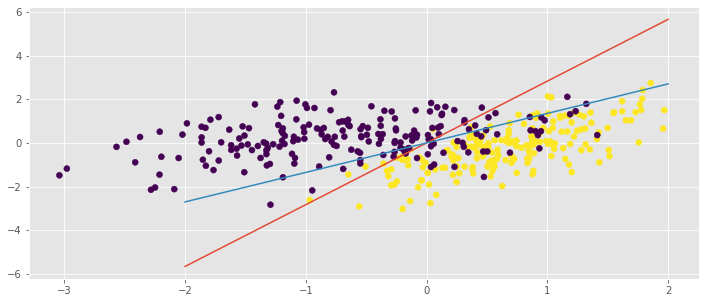

In [111]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape)
print(y.shape)

my_clf_lin = MySGDClassifier(batch_generator, alpha=0.01, C=1, max_epoch=10,
                             model_type='lin_reg', batch_size=1)
my_clf_lin.fit(X, y)
plot_decision_boundary(my_clf_lin)

# my_clf_lin = MySGDClassifier(batch_generator, alpha=0.01, C=1, max_epoch=10,
#                              model_type='lin_reg', batch_size = 1)
# my_clf_lin.fit(X, y)
# plot_decision_boundary(my_clf_lin)

my_clf_log = MySGDClassifier(batch_generator, alpha=0.01, C=1, max_epoch=10,
                             model_type='lin_reg')
my_clf_log.fit(X, y)
plot_decision_boundary(my_clf_log)

# my_clf_log1 = MySGDClassifier(batch_generator, alpha=0.01, C=1, max_epoch=1,
# model_type='lin_reg')
# my_clf_log1.fit(X, y)
# plot_decision_boundary(my_clf_log1)

plt.scatter(X[:, 0], X[:, 1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [112]:
from sklearn.datasets import make_classification

In [113]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

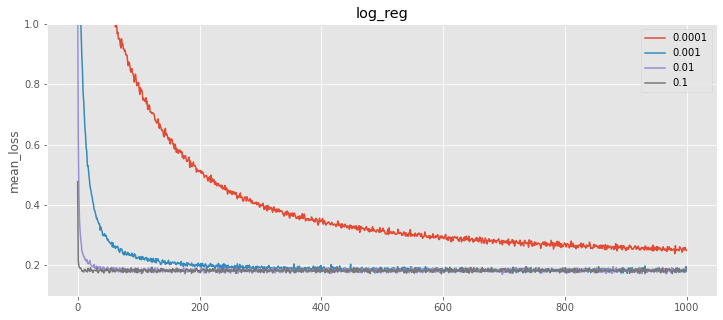

In [122]:
for alpha in [0.0001, 0.001, 0.01, 0.1]:
    clf = MySGDClassifier(batch_generator, C=100, alpha=alpha,
                          max_epoch=100, model_type='log_reg',
                          batch_size=100)
    clf.fit(X, y)
    N = 100
    loss = np.asarray(clf.errors_log["loss"]).reshape(-1, N)
    mean = np.mean(loss, axis=1)
    plt.plot(mean, label=alpha)
plt.ylim(top=1)
plt.title("log_reg")
plt.ylabel("mean_loss")
plt.legend()
plt.show()

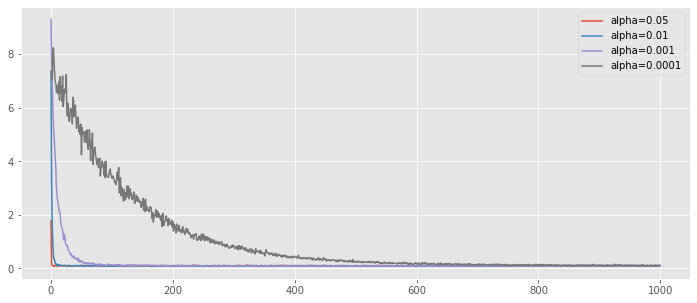

In [123]:
N = 10
plt.figure()
for a in [0.05, 0.01, 0.001, 0.0001]:
    my_clf_lin = MySGDClassifier(batch_generator, max_epoch=1,
                                 alpha=a, batch_size=10)
    my_clf_lin.fit(X, y)
    epoch = []
    loss = []
    for i in range(0, len(my_clf_lin.errors_log['iter']), N):
        epoch.append(i/N)
        loss.append(sum(my_clf_lin.errors_log['loss'][i: i + N]) / N)
    plt.plot(epoch, loss, label=f'alpha={a}')
plt.legend()

In [97]:
len(my_clf_lin.errors_log['loss'])

6666

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Чем больше alpha, тем быстрее сходится алгоритм.Однако aplha должно лежать в нужных пределах, которые подбираются во время валидации. Нпример, если выбрать слишком большое alpha, то высока вероятность сделать слишком большой шаг в сторону антиградиента и перескочить минимум. 

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [134]:
weights_lin = []
weights_log = []
C = np.logspace(3, -3, 10)
for C_test in C:
    my_clf_lin = MySGDClassifier(batch_generator, max_epoch=10, C=C_test,
                                 model_type='lin_reg', batch_size=100,
                                 alpha=0.01)
    my_clf_lin.fit(X, y)
    weights_lin.append(np.mean(my_clf_lin.weights))
    my_clf_log = MySGDClassifier(batch_generator, model_type="log_reg",
                                 max_epoch=10, batch_size=100,
                                 alpha=0.01, C=C_test)
    my_clf_log.fit(X, y)
    weights_log.append(np.mean(my_clf_log.weights))

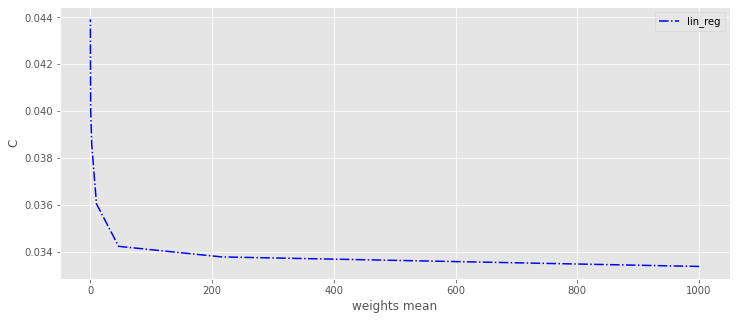

In [126]:
plt.figure()
ax = plt.subplot()
ax.plot(C, weights_lin, 'b-.', label='lin_reg')
ax.set_xlabel('weights mean')
ax.set_ylabel('C')
ax.legend()

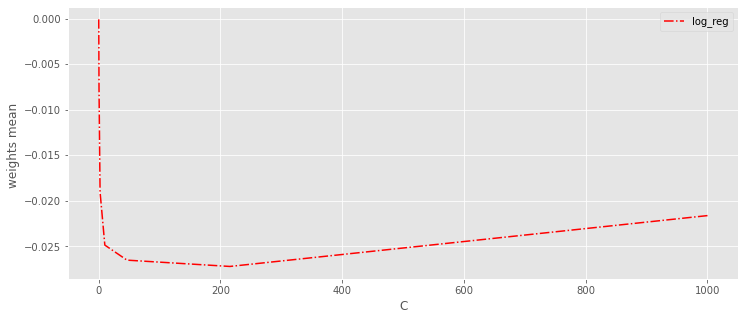

In [135]:
plt.figure()
ax = plt.subplot()
# ax.plot(C, weights_lin, 'b-.', label='lin_reg')
ax.plot(C, weights_log, 'r-.', label='log_reg')
ax.set_xlabel('C')
ax.set_ylabel('weights mean ')
ax.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [7]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))

28026


In [8]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [9]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print(X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [12]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [145]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [12]:
C_test = [50, 100, 150]
alpha_test = [0.01, 0.005]
epoch_test = [1, 5, 10, 50, 100]
batch_size_test = [10, 50, 100]
model_type_test = ['lin_reg', 'log_reg']
kf_score = 0
max_score = 0


C_result = 0
alpha_result = 0
epoch_result = 0
model_result = ''
batch_size_result = 0


for C_kf in C_test:
    for alpha in alpha_test:
        for epoch in epoch_test:
            for model in model_type_test:
                for batch in batch_size_test:
                    kf_score = 0
                    for train_index, test_index in kf.split(X_train):
                        X_tr, y_tr = X_train[train_index], y_train[train_index]
                        X_test, y_test = X_train[test_index], y_train[test_index]
                        my_clf_lin = MySGDClassifier(batch_generator, max_epoch=epoch, C=C_kf,
                        model_type=model, batch_size=batch, alpha=alpha)
                        my_clf_lin.fit(X_tr, y_tr)
                        y_pred = my_clf_lin.predict(X_test)
                        kf_score += roc_auc_score(y_test, y_pred)
                    if (kf_score / 5 > max_score):
                        max_score = kf_score / 5
                        C_result = C_kf
                        alpha_result = alpha
                        epoch_result = epoch
                        model_result = model
                        batch_size_result = batch

In [205]:
C_test = [10, 5, 3, 12, 50]
alpha_test = [0.01, 0.015]
epoch_test = [1, 10, 20]
batch_size_test = [10, 7, 25]
model_type_test = ['log_reg']
kf_score = 0
max_score = 0


C_result = 0
alpha_result = 0
epoch_result = 0
model_result = ''
batch_size_result = 0


for C_kf in C_test:
    for alpha in alpha_test:
        for epoch in epoch_test:
            for model in model_type_test:
                for batch in batch_size_test:
                    kf_score = 0
                    for train_index, test_index in kf.split(X_train):
                        X_tr = X_train[train_index]
                        y_tr = y_train[train_index]
                        X_test = X_train[test_index]
                        y_test = y_train[test_index]
                        my_clf_lin = MySGDClassifier(batch_generator,
                                                     max_epoch=epoch,
                                                     C=C_kf,
                                                     model_type=model,
                                                     batch_size=batch,
                                                     alpha=alpha)
                        my_clf_lin.fit(X_tr, y_tr)
                        y_pred = my_clf_lin.predict(X_test)
                        kf_score += roc_auc_score(y_test, y_pred)
                    if (kf_score / 5 > max_score):
                        max_score = kf_score / 5
                        C_result = C_kf
                        alpha_result = alpha
                        epoch_result = epoch
                        model_result = model
                        batch_size_result = batch

In [341]:
print(C_result)
print(alpha_result)
print(epoch_result)
print(model_result)
print(batch_size_result)
print(max_score)

In [208]:
C_result

5

In [211]:
alpha_result

0.015

In [212]:
epoch_result

20

In [215]:
batch_size_result

7

In [216]:
max_score

0.8012367989127706

In [16]:
print(C_result)
print(alpha_result)
print(epoch_result)
print(model_result)
print(batch_size_result)
print(max_score)

3
0.01
20
log_reg
7
0.801289879548284


In [14]:
print(C_result)
print(alpha_result)
print(epoch_result)
print(model_result)
print(batch_size_result)
print(max_score)

10
0.01
100
log_reg
7
0.8008915843788067


In [60]:
print(C_result)
print(alpha_result)
print(epoch_result)
print(model_result)
print(batch_size_result)
print(max_score)


150
0.01
50
log_reg
10
0.8004996135319209


In [55]:
print(C_result)
print(alpha_result)
print(epoch_result)
print(model_result)
print(max_score)

50
0.01
100
log_reg
0.7998259078517531


In [31]:
print(C_result)
print(alpha_result)
print(epoch_result)
print(model_result)
print(max_score)

100
0.0001
5
lin-reg
0.8008198907874873


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [22]:
print(C_result)
print(alpha_result)
print(epoch_result)
print(model_result)
print(max_score)

100
0.0001
10
log-reg
0.7980570907791288


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [257]:
score = np.zeros(500, dtype=float).reshape(5, -1)
kf = KFold(n_splits=5)
row = 0
for train_index, test_index in kf.split(X_train):
    X_tr = X_train[train_index]
    y_tr = y_train[train_index]
    X_test = X_train[test_index]
    y_test = y_train[test_index]
    clf = MySGDClassifier(batch_generator, model_type="log_reg", max_epoch=20,
                          alpha=0.015, C=5, batch_size=7)
    my_clf.fit(X_tr, y_tr)
    y_pred = my_clf.predict(X_test)
    for i in range(100):
        score[row][i] = f1_score(y_test, y_pred > i * 0.01)
    row += 1
# print(score)
# mean_score = np.mean(score, axis = 0)
# np.where(mean_score == mean_score.max())
# mean_score

In [258]:
mean_score = np.mean(score, axis=0)
print(mean_score.max())
np.where(mean_score == mean_score.max())

(array([48]),)

In [259]:
mean_score.max()

0.48397147514700833

In [78]:
mean_score = np.mean(score, axis = 0)
print(mean_score.max())
np.where(mean_score == mean_score.max())

0.40265194269029075


(array([0]),)

In [10]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [13]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [21]:
my_clf = MySGDClassifier(batch_generator, model_type="log_reg", max_epoch=20,
                      alpha=0.015, C=5, batch_size=100)
my_clf.fit(X_train, y_train)
y_pred = my_clf.predict(X_test)
test_data["target"] = pd.Series(np.array((y_pred > 0.43), dtype=int))
with open("res.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

In [307]:
res = pd.read_csv('res.csv')
res.describe()
res[res['target'] == 1]

,pair_id,target
2,11693,1
3,11694,1
8,11699,1
13,11704,1
16,11707,1
...,...,...
16617,28308,1
16622,28313,1
16623,28314,1
16624,28315,1


** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [ ]:
Nelly Perfilyeva

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***